**------------Build Linear regression Model-----------**

**>>>>>>>>>>>>Step1: import packages and libraries.>>>>>>>>>>>>**

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle as pk
import warnings 

**>>>>>>>>>Step2: Read the data and understood the data.>>>>>>>>>>>**

In [5]:
advertisement_df=pd.read_csv(r"C:\Users\Mrityunjay\Data Science Naresh it\Class Assiments\Machain Learning\Model_development\archive\advertising.csv")
advertisement_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
input_data=advertisement_df.drop("Sales",axis=1)
input_data

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
output_data=advertisement_df["Sales"]
output_data

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [178]:
advertisement_df.head(8)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2


In [180]:
advertisement_df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [42]:
import warnings
warnings.filterwarnings('ignore')

**>>>>>>>>>>Knowing about data.>>>>>>>>>>>>>**

In [17]:
advertisement_df.shape

(200, 4)

In [21]:
advertisement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [33]:
advertisement_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**>>>>>>>>>>>>Step3:Clean the data.>>>>>>>>>>>>>**

In [35]:
#check the null value and removing.
advertisement_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

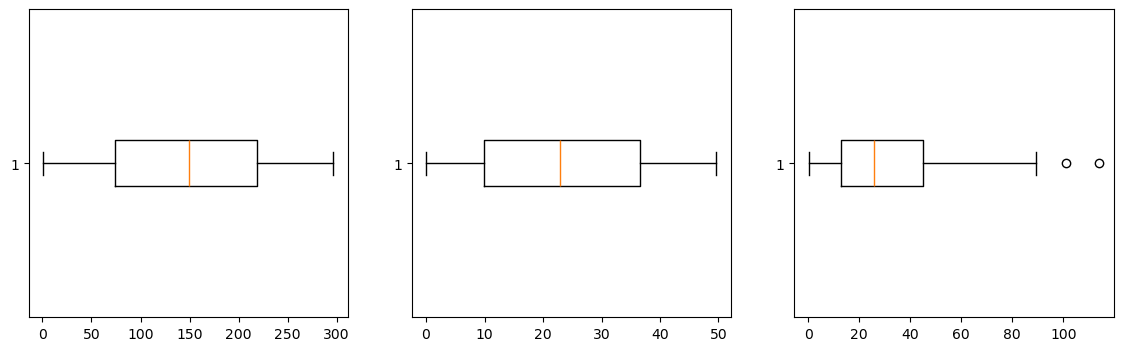

In [80]:
#check the outliers and remove it.
plt.figure(figsize=(14,4))
plt.subplot(1,3,1).boxplot(advertisement_df["TV"],vert=False)
plt.subplot(1,3,2).boxplot(advertisement_df["Radio"],vert=False)
plt.subplot(1,3,3).boxplot(advertisement_df["Newspaper"],vert=False)
plt.show()

**there is not outliers avilable in datasets.**

**>>>>>>>>>>>>Step4: Perform EDA.>>>>>>>>>>>>**

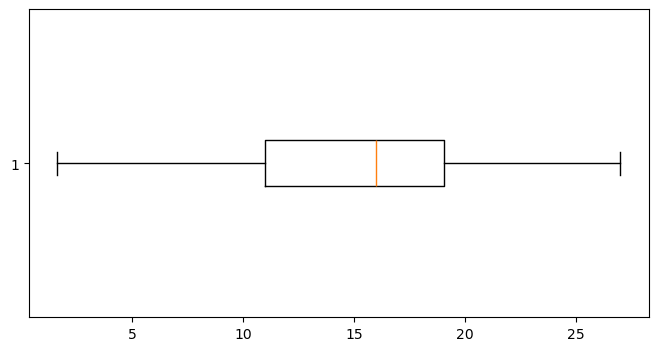

In [190]:
#sales boxplot
plt.figure(figsize=(8,4))
plt.boxplot(advertisement_df["Sales"],vert=False)
plt.show()

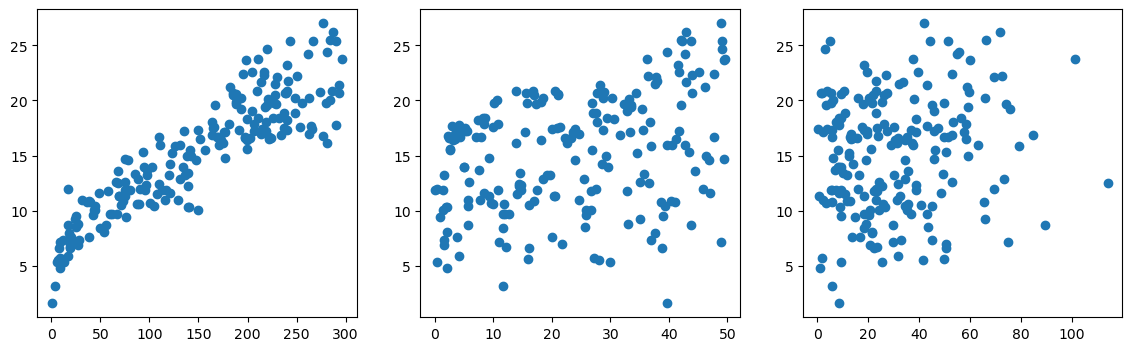

In [192]:
#plot scatter for relation features and sales
plt.figure(figsize=(14,4))
Sales=advertisement_df["Sales"]
plt.subplot(1,3,1).scatter(advertisement_df["TV"],Sales)
plt.subplot(1,3,2).scatter(advertisement_df["Radio"],Sales)
plt.subplot(1,3,3).scatter(advertisement_df["Newspaper"],Sales)
plt.show()

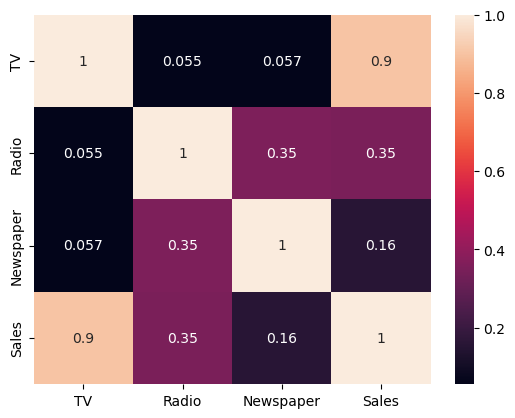

In [110]:
#find coreleation 
corr_=advertisement_df.corr()
sns.heatmap(corr_,annot=True)
plt.show()

**Step5: Build the Liner Model.**

In [113]:
X=advertisement_df.drop("Sales",axis=1)
Y=advertisement_df["Sales"]

In [115]:
advertisement_df.drop("Sales",axis=1)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [117]:
#split input and output advertisement data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=136)

In [123]:
from sklearn import model_selection
dir(model_selection)

['BaseCrossValidator',
 'BaseShuffleSplit',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit',
 'KFold',
 'LearningCurveDisplay',
 'LeaveOneGroupOut',
 'LeaveOneOut',
 'LeavePGroupsOut',
 'LeavePOut',
 'ParameterGrid',
 'ParameterSampler',
 'PredefinedSplit',
 'RandomizedSearchCV',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'ShuffleSplit',
 'StratifiedGroupKFold',
 'StratifiedKFold',
 'StratifiedShuffleSplit',
 'TimeSeriesSplit',
 'ValidationCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_plot',
 '_search',
 '_split',
 '_validation',
 'check_cv',
 'cross_val_predict',
 'cross_val_score',
 'cross_validate',
 'learning_curve',
 'permutation_test_score',
 'train_test_split',
 'typing',
 'validation_curve']

In [197]:
#model development
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**>>>>> model is ready >>>>>**

In [199]:
#predict the x_train data
y_pred=model.predict(x_train)
y_actual=y_train
print(y_actual.values)
print(y_pred)

[19.2 25.4 10.8 14.6 16.1 23.7 17.1 14.7 13.6 25.5 14.  19.4  4.8 22.4
 17.5 17.2 11.9  7.3  8.8  5.5 14.  14.2 22.6 15.3 13.2 11.  18.4 12.9
 14.6 17.6 18.9  7.2 11.3 12.4 19.7 10.3 11.9 17.4 16.7 10.6 12.5 15.
 20.1 18.2 20.5 20.  22.3 17.6 16.6  7.6  5.6 10.5 17.9 16.4  7.6 16.
  8.5 16.7  8.7 20.8 26.2  6.7 17.4 11.  11.6 19.6 10.9 23.8 11.9 15.5
 18.   6.6 20.7 25.4 20.5 22.6 13.7 20.9 13.4 24.2  7.3 17.9 19.7 11.6
  9.7 11.3 10.1 14.8 27.  17.8 16.  19.8 19.  15.2  9.5 22.2  9.6 17.
 10.6  7.  17.3 10.1 20.2 17.7 16.6 11.8 16.8 24.4 12.  10.7 21.4 15.6
 16.5 24.7  8.7 17.  19.9 18.4 17.5 16.7 18.3 11.9 21.5 20.6 16.9 20.9
 10.9 13.3 20.7 17.1  5.3  8.1 10.4  6.9 10.3 16.4 12.  20.9 23.2 19.8
 20.2 12.6 12.9 14.   8.4  6.6 11.  20.2 19.6 10.8]
[19.2 25.4 10.8 14.6 16.1 23.7 17.1 14.7 13.6 25.5 14.  19.4  4.8 22.4
 17.5 17.2 11.9  7.3  8.8  5.5 14.  14.2 22.6 15.3 13.2 11.  18.4 12.9
 14.6 17.6 18.9  7.2 11.3 12.4 19.7 10.3 11.9 17.4 16.7 10.6 12.5 15.
 20.1 18.2 20.5 20.  22.3 17.

In [153]:
for i in zip(y_pred,y_actual):
    print(i,end=" , ")

(18.86931771583075, 19.2) , (23.28596841684662, 25.4) , (10.991300141610857, 10.8) , (15.467860463125474, 14.6) , (16.694668521112835, 16.1) , (20.873664136518222, 23.7) , (18.00732893728945, 17.1) , (14.38430312437448, 14.7) , (13.552826915838915, 13.6) , (24.467192761750077, 25.5) , (10.527940185304935, 14.0) , (20.037384992042, 19.4) , (5.712221462303837, 4.8) , (20.540362589939193, 22.4) , (18.040715481000323, 17.5) , (16.700915427279966, 17.2) , (12.755719431035835, 11.9) , (9.598947257131865, 7.3) , (10.127764296034968, 8.8) , (8.373220494198943, 5.5) , (12.646785662968112, 14.0) , (14.612599187942381, 14.2) , (20.979120189438206, 22.6) , (14.686627231645927, 15.3) , (10.141948099449927, 13.2) , (9.52310880455445, 11.0) , (18.267137105817504, 18.4) , (12.147527766261831, 12.9) , (14.3465236003899, 14.6) , (14.840024171593392, 17.6) , (21.196153629191997, 18.9) , (10.622593368333987, 7.2) , (9.750320670954817, 11.3) , (12.280198355165222, 12.4) , (20.419226144070535, 19.7) , (12.4

In [163]:
#actual and predection value in one df
x_train["y_actual"]=y_actual
x_train["y_predection"]=y_pred
x_train

,TV,Radio,Newspaper,y_actual,y_predection
141,193.7,35.4,75.6,19.2,18.869318
147,243.2,49.0,44.3,25.4,23.285968
134,36.9,38.6,65.6,10.8,10.991300
19,147.3,23.9,19.1,14.6,15.467860
45,175.1,22.5,31.5,16.1,16.694669
...,...,...,...,...,...
119,19.4,16.0,22.3,6.6,7.746664
73,129.4,5.7,31.3,11.0,12.327198
54,262.7,28.8,15.9,20.2,22.178722
133,219.8,33.5,45.1,19.6,20.244985


**>>>>>>>>>>Step6:Save the model and use it predict the value.>>>>>>>>>>>**

In [168]:
#save the model
pk.dump(model,open("advertisement&sales_predection.pkl","wb"))

In [170]:
#load the model 
model=pk.load(open("advertisement&sales_predection.pkl","rb"))
model

LinearRegression()

In [174]:
warnings.filterwarnings('ignore')

In [172]:
#predict with raw and new data
model.predict([[405,302,679]])

array([56.76146728])

In [ ]:
####################### the end #############################